In [2]:
import os
from llama_index.core import Settings
from llama_index.llms.groq import Groq
import dotenv

dotenv.load_dotenv()

True

In [3]:
Settings.llm = Groq(model="llama3-70b-8192",
                    api_key=os.getenv("groqKey"))

In [4]:
from llama_index.experimental.query_engine import PandasQueryEngine

In [5]:
import pandas as pd

df = pd.read_csv("vendas.csv")

In [6]:
query_engine = PandasQueryEngine(df=df,verbose=True)

In [7]:
response = query_engine.query("Qual é o tipo de produto mais vendido?")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.tipo_produto.value_counts().index[0]
```
> Pandas Output: Moda


In [8]:
df.tipo_produto.value_counts().index[0]

'Moda'

In [9]:
response

Response(response='Moda', source_nodes=[], metadata={'pandas_instruction_str': 'df.tipo_produto.value_counts().index[0]', 'raw_pandas_output': 'Moda'})

### respostas mais elaboradas

In [10]:
query_engine = PandasQueryEngine(df=df,verbose=True,synthesize_response=True)

In [11]:
response = query_engine.query("qual e a avaliação media de cada filial")
response

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


Response(response='A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.', source_nodes=[], metadata={'pandas_instruction_str': "df.groupby('filial')['avaliacao'].mean()", 'raw_pandas_output': 'filial\nA    7.027059\nB    6.818072\nC    7.072866\nName: avaliacao, dtype: float64'})

In [12]:
import textwrap
def format_text(response):
    text = response.response
    text_formated = textwrap.fill(text,width=100)
    print(text_formated)

In [13]:
format_text(response)

A avaliação média de cada filial é a seguinte: a filial A tem uma avaliação média de 7.03, a filial
B tem uma avaliação média de 6.82 e a filial C tem uma avaliação média de 7.07.


### geração de gráficos

In [14]:
response = query_engine.query("exiba pra mim a distruibuição das avaliações")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df['avaliacao'].value_counts()
```
> Pandas Output: avaliacao
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.avaliacao.plot(kind='hist')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


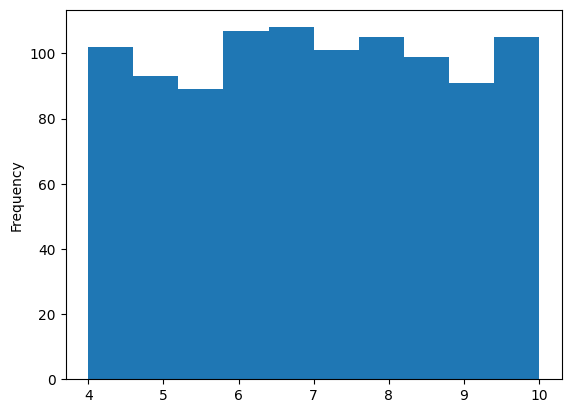

In [15]:
response = query_engine.query("exiba para mim um grafico da distribuição das avaliações")

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


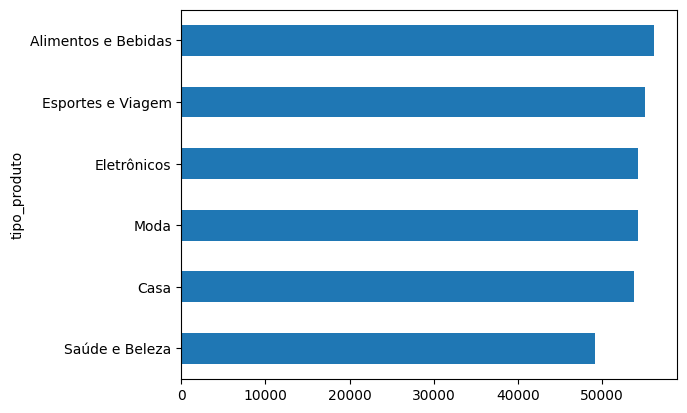

In [16]:
response = query_engine.query("""
crie um gráfico da soma do total do port tipo_produto ordenando
                              do menor para maior e matenha a barra horizontal
""")

In [28]:
from llama_index.core import PromptTemplate

prompt = PromptTemplate(
    "você é um analista de dados que auxília o usuárioa analisar os dados dele."
    "Responda sempre em português e responda para o usuário com todas a informações que consegui sobre a pergunta"
    "pergunta:{query}"
)

In [32]:
response = query_engine.query(prompt.format(query="pode me dizer se a distribuição dos dados estão boas e com base na analise pode me dizer se precisa de padronização."))

INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
> Pandas Instructions:
```
(df.dtypes != 'object').mean() > 0.5 and df.nunique().mean() > 1
```
> Pandas Output: False
INFO:httpx:HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"


In [33]:
format_text(response)

Olá!  Analisando os seus dados, observei que a distribuição dos dados não está ideal. A razão pela
qual eu digo isso é que a proporção de colunas com tipos de dados numéricos é menor que 50%. Além
disso, a média do número de valores únicos por coluna também é menor que 1.  Isso sugere que os
dados possuem uma grande quantidade de informações categóricas ou de texto, o que pode dificultar a
análise e a interpretação dos resultados. Além disso, a baixa variedade de valores únicos pode
indicar que os dados possuem muitas duplicatas ou valores muito frequentes.  Com base nessa análise,
eu recomendaria que você realize uma padronização dos dados para melhorar a qualidade e a
consistência dos mesmos. Isso pode incluir a remoção de duplicatas, a conversão de tipos de dados
inconsistentes e a aplicação de técnicas de pré-processamento de dados, como a normalização ou a
transformação de variáveis.  Dessa forma, você poderá obter insights mais precisos e confiáveis a
partir dos seus dados. Se vo